In [1]:
import torch
torch.__version__

/home/chengyuli/miniconda3/envs/DL/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.13.1+cu117'

In [2]:
# 方法1
x = torch.randn(3, 4, requires_grad=True)
x

tensor([[ 0.2160,  0.7093, -0.2303,  0.2585],
        [-1.3333,  1.5848, -0.1259, -0.6114],
        [ 1.5410, -0.4371,  2.2611, -0.7917]], requires_grad=True)

In [3]:
# 方法2
x = torch.randn(3, 4)
x.requires_grad = True
x

tensor([[ 0.7467,  0.3687, -1.6043,  0.6994],
        [-1.1232, -0.8702,  1.9004,  0.7983],
        [-0.0106, -1.9352,  0.2968, -1.4285]], requires_grad=True)

In [4]:
b = torch.randn(3, 4, requires_grad=True)

In [5]:
t = x + b

In [6]:
y = t.sum()
y

tensor(-5.3222, grad_fn=<SumBackward0>)

In [7]:
y.backward()

In [9]:
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [10]:
x.requires_grad, b.requires_grad, t.requires_grad

(True, True, True)

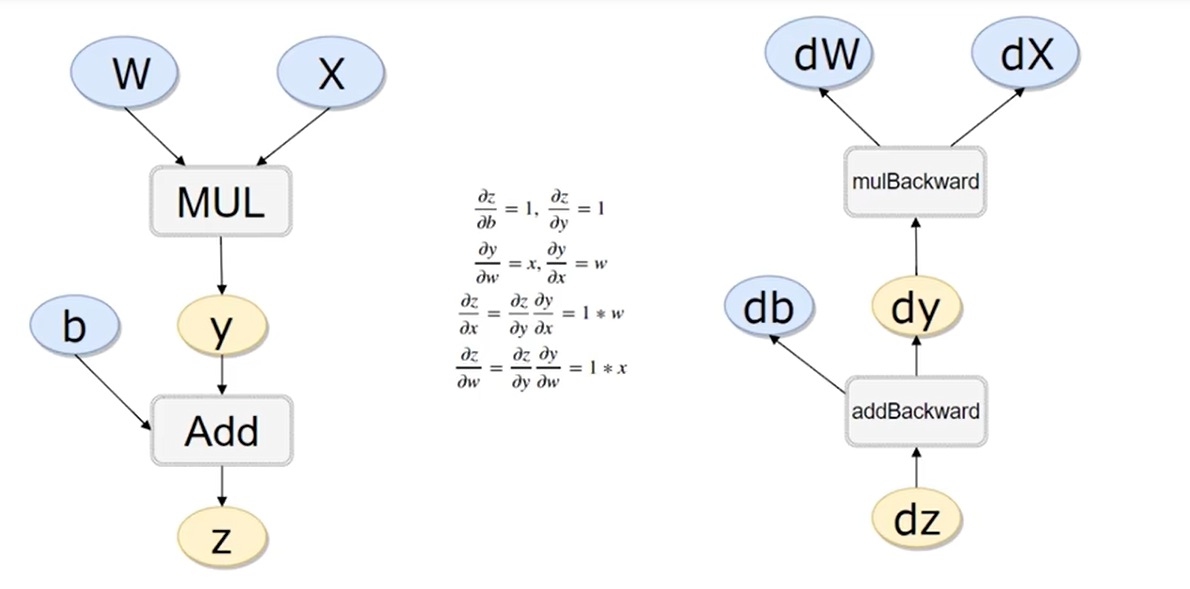

In [11]:
# 实现流程
x = torch.rand(1)
b = torch.rand(1, requires_grad=True)
w = torch.rand(1, requires_grad=True)
y = w * x
z = y + b

In [12]:
x.requires_grad, b.requires_grad, w.requires_grad, y.requires_grad

(False, True, True, True)

In [13]:
x.is_leaf, w.is_leaf, b.is_leaf, y.is_leaf, z.is_leaf

(True, True, True, False, False)

In [14]:
# 反向传播计算，梯度需要清零
z.backward(retain_graph=True)

In [15]:
w.grad

tensor([0.3991])

In [16]:
b.grad

tensor([1.])

In [ ]:
# 清零 -> 计算 -> 更新